<h1> Data Analytics - 1 (Linear regression) </h1>

<h4> Problem Statement </h4>
<h5>Create a Linear Regression Model using Python/R to predict home
prices using Boston Housing .Dataset (https://www.kaggle.com/c/boston-housing). The Boston
Housing dataset contains information about various houses in Boston through different parameters.
There are 506 samples
and 14 feature variables in this dataset.The objective is to predict the value of prices of the house
using the given features.</h5>

In [23]:
# imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [24]:
temp = fetch_california_housing()

In [25]:
temp.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [26]:
data = pd.DataFrame(temp.data, columns=temp.feature_names)
target = pd.DataFrame(temp.target, columns=['MEDV'])

In [27]:
data["target"] = target
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
12395,7.4382,11.0,10.822651,1.755926,2450.0,2.151010,33.72,-116.33,3.531
14812,4.7891,19.0,4.693467,1.343384,1159.0,1.941374,32.69,-117.17,3.346
14958,4.9528,13.0,7.521031,1.162822,2074.0,2.814111,32.76,-116.95,2.662
139,6.3302,39.0,7.540000,1.068000,1265.0,2.530000,37.82,-122.20,3.628
12938,6.1872,19.0,7.415686,1.043137,678.0,2.658824,38.66,-121.27,1.887


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [29]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

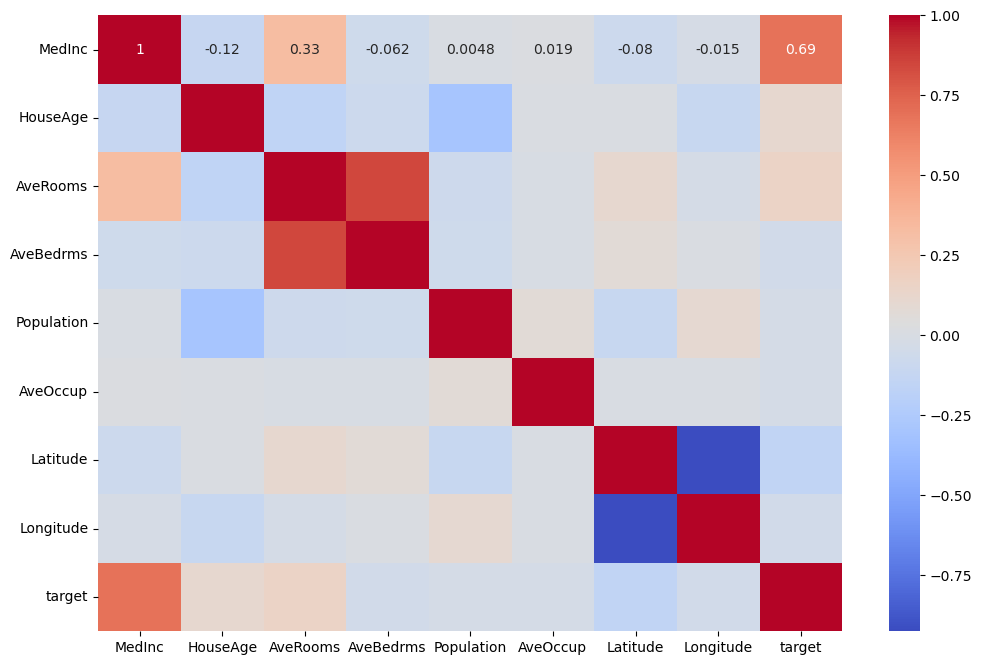

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot= True, cmap= 'coolwarm');

Features that affect target (High value for -ve or +ve corelation): 'LSTAT', 'RM', 'TAX', 'INDUS' 

In [42]:
train_df= data[['HouseAge', 'AveRooms', 'Population','AveOccup','target']]

In [44]:
x = train_df[['HouseAge', 'AveRooms', 'Population','AveOccup']]
y = train_df['target']

In [45]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

<h3> Training </h3>

In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h3> Evaluation </h3>

In [48]:
y_pred = model.predict(x_test)

In [52]:
y_pred[:5]

array([2.1023911 , 1.97985017, 2.21627339, 2.10170242, 2.09684096])

In [53]:
y_test[:5]

5443     3.213
12024    0.858
5047     3.504
9753     2.700
14144    1.265
Name: target, dtype: float64

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

1.3017381840507325

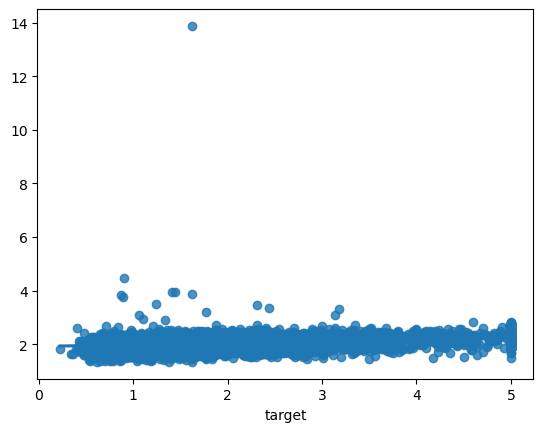

In [41]:
sns.regplot(x = y_test, y = y_pred, ci= 95);